# 1. car seat 매출 예측

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 이를 해결하고자 여러분들에게 예측 모델링을 의뢰하였습니다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|


## 0.환경준비

### 0.1 Import

In [3]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 0.2 Data Loading

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


In [5]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_test_x.csv'

test = pd.read_csv(path)
test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,131.0,111.0,13,33,80,Bad,68,18,Yes,Yes
1,123.0,57.0,0,66,105,Medium,39,11,Yes,No
2,136.0,60.0,7,303,147,Medium,41,10,Yes,Yes
3,143.0,77.0,25,448,156,Medium,43,17,Yes,Yes
4,111.0,75.0,1,377,108,Good,25,12,Yes,No


## 1.데이터 탐색

## 2.데이터 전처리 

In [6]:
target = 'Sales'

### 2.2 NaN에 대한 조치

In [7]:
data.isna().sum()

Sales           0
CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

In [8]:
data.tail(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
299,10.1,135.0,63.0,15,213,134,Medium,32,10,Yes,Yes


In [9]:
# 경쟁사가격이랑 수입이 각각 13건 12건이 있었으나 총 데이터가 300개의 셋으로 확인되어 이 결측치가 존재하는 열을 삭제해도
# 큰영향이 없을것이라 판단되어 삭제
data.dropna(axis=0, inplace=True) 
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행 필요

In [10]:
data.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes


In [11]:
# data['Advertising'].value_counts()
data['Education'].value_counts() # 평균학력 수준
bins =[10, 13, 16, 18]
data['Edu_level'] = pd.cut(data['Education'], bins = bins, labels = ['L', 'M', 'H'])

In [12]:
data.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Edu_level
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes,L
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes,L
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes,L


In [13]:
dummy_var = ['ShelveLoc', 'Urban', 'US','Edu_level']
data = pd.get_dummies(data, columns=dummy_var, drop_first=True)
data.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Edu_level_M,Edu_level_H
0,3.72,139.0,111.0,5,310,132,62,13,0,0,1,1,0,0
1,2.93,143.0,21.0,5,81,160,67,12,0,1,0,1,0,0
3,8.47,119.0,88.0,10,170,101,61,13,0,1,1,1,0,0


### 데이터를 feature와 , target으로 분할

In [14]:
# 가변수화 이후진행
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [15]:
x.shape, y.shape

((275, 13), (275,))

In [16]:
x.head(2)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Edu_level_M,Edu_level_H
0,139.0,111.0,5,310,132,62,13,0,0,1,1,0,0
1,143.0,21.0,5,81,160,67,12,0,1,0,1,0,0


In [17]:
# 정규화 (2.6 min-max scaling)
x = (x - x.min()) / (x.max() - x.min())

### 2.5 데이터 분할

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2022)

In [20]:
x.head(2)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Edu_level_M,Edu_level_H
0,0.595506,0.909091,0.172414,0.599598,0.584507,0.672727,0.375,0.0,0.0,1.0,1.0,0.0,0.0
1,0.640449,0.000000,0.172414,0.138833,0.781690,0.763636,0.250,0.0,1.0,0.0,1.0,0.0,0.0


## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기


In [31]:
# 사용할 알고리즘

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# 성능 검증용

from sklearn.model_selection import cross_val_score, GridSearchCV

# 성능 평가용

from sklearn.metrics import mean_absolute_error, r2_score

result = {}

### 3.2 모델링

#### (1) Linear Regression 모델링

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred = model.predict(x_test)

In [37]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))
result['Linear Regression'] = mean_absolute_error(y_test,y_pred).round(3)

0.8241715887428712
0.8700619801270341


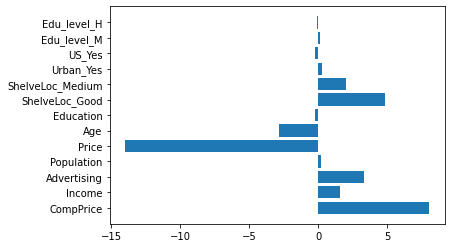

In [36]:
# 변수 가중치 시각화
plt.barh(y=list(x), width=model.coef_.reshape(-1))
plt.show()

#### (2) Decision Tree 모델링

In [38]:
model_dec = DecisionTreeRegressor(random_state=2022)

In [39]:
param = {'max_depth': range(1,11)}

# Grid Search 모델 선언
model = GridSearchCV(model_dec, param, cv=10, scoring='r2')

In [40]:
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=2022),
             param_grid={'max_depth': range(1, 11)}, scoring='r2')

In [41]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': 4}
0.4177480306577029


In [42]:
y_pred = model.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
result['Decision Tree'] = mean_absolute_error(y_test,y_pred).round(3)

0.19278895004533492
1.8140672605172603


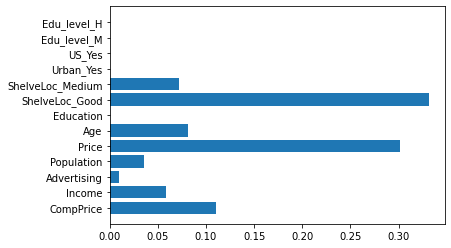

In [89]:
# 변수 중요도 시각화
plt.barh(y=list(x), width= model.best_estimator_.feature_importances_)
plt.show()

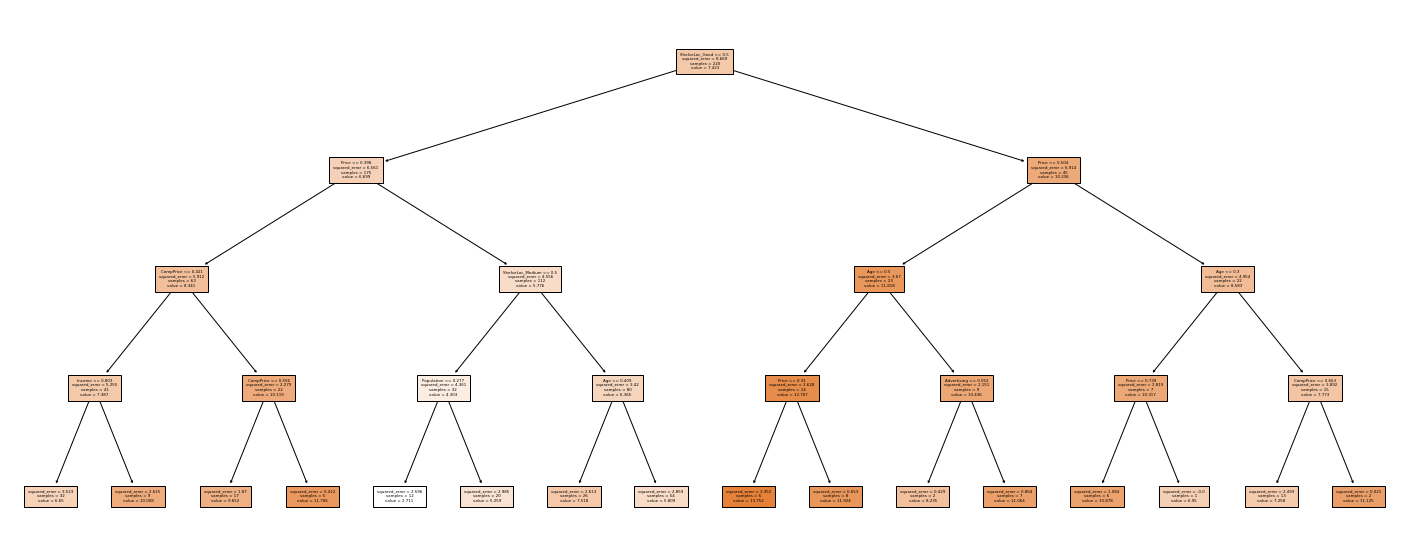

In [90]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
plot_tree(model.best_estimator_, 
          filled=True,
          feature_names=list(x),
          fontsize=4)
plt.show()

#### (3) KNN 모델링

In [43]:
model_knn = KNeighborsRegressor()

param = {'n_neighbors': range(1,11)}

model = GridSearchCV(model_knn, param, cv=10, scoring='r2')

In [44]:
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='r2')

In [45]:
# 최적파라미터, 성능 확인
print(model.best_params_)
print(model.best_score_)

{'n_neighbors': 7}
0.3400206612232151


In [46]:
y_pred = model.predict(x_test)

In [47]:
mean_absolute_error(y_test,y_pred)
result['KNN'] = mean_absolute_error(y_test,y_pred).round(3)

#### (5) Random Forest 모델링

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
model = RandomForestRegressor(random_state=2022)

In [50]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=2022)

In [51]:
y_pred = model.predict(x_test)

In [52]:
mean_absolute_error(y_test,y_pred)
result['Random Forest'] = mean_absolute_error(y_test,y_pred).round(3)

#### (6) XGB 모델링

In [53]:
model = XGBRegressor(random_state = 2022)

In [54]:
# Cross_val로 검증해보기
cv_score = cross_val_score(model, x_train,y_train, cv=10)
cv_score.mean()

0.5755073244982403

In [24]:
# XGB 최적화
model_xgb = XGBRegressor()
param = {'max_depth': range(3,11), 'n_estimators': range(50, 101, 10)}
model = GridSearchCV(model_xgb, param, cv=10, scoring='r2')

In [25]:
model.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [26]:
print(list(x))
print(model.best_score_)
print(model.best_params_)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes', 'Edu_level_M', 'Edu_level_H']
0.6870938081573384
{'max_depth': 3, 'n_estimators': 70}


In [27]:
y_pred = model.predict(x_test)

In [29]:
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.0882105686881325
0.710671076213115


In [56]:
result['XGB'] = 1.088

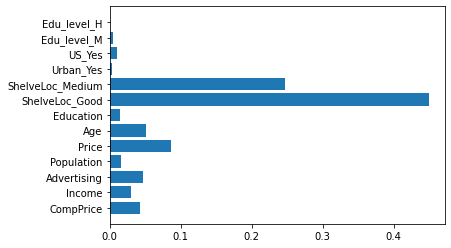

In [30]:
# 변수 중요도 시각화
plt.barh(y=list(x), width= model.best_estimator_.feature_importances_)
plt.show()

## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [106]:
import tensorflow as tf
from tensorflow import keras

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계

* 모델1 

In [110]:
x_train.shape, y_train.shape

((220, 13), (220,))

In [111]:
x.shape, y.shape

((275, 13), (275,))

In [124]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(13,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1)) # 회귀문제이므로 필요없다

model.compile(loss= keras.losses.mean_absolute_error, optimizer= keras.optimizers.Adam(learning_rate=0.01))

In [125]:
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True, verbose=1)

In [127]:
model.fit(x_train, y_train, epochs=200, verbose=1, callbacks=[es], validation_split=0.2, batch_size=128)

Epoch 1/200
2/2 [==============================] - 1s 183ms/step - loss: 6.9105 - val_loss: 5.5003
Epoch 2/200
2/2 [==============================] - 0s 35ms/step - loss: 4.9559 - val_loss: 3.1151
Epoch 3/200
2/2 [==============================] - 0s 39ms/step - loss: 3.0216 - val_loss: 2.6058
Epoch 4/200
2/2 [==============================] - 0s 40ms/step - loss: 3.2035 - val_loss: 3.1310
Epoch 5/200
2/2 [==============================] - 0s 36ms/step - loss: 3.3237 - val_loss: 2.2571
Epoch 6/200
2/2 [==============================] - 0s 37ms/step - loss: 2.5484 - val_loss: 2.2527
Epoch 7/200
2/2 [==============================] - 0s 34ms/step - loss: 2.4854 - val_loss: 2.6106
Epoch 8/200
2/2 [==============================] - 0s 38ms/step - loss: 2.6643 - val_loss: 2.6529
Epoch 9/200
2/2 [==============================] - 0s 40ms/step - loss: 2.6039 - val_loss: 2.2890
Epoch 10/200
2/2 [==============================] - 0s 33ms/step - loss: 2.3485 - val_loss: 1.9433
Epoch 11/200
2/2 [

In [128]:
y_pred = model.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

[[6.5712323]
 [9.128499 ]
 [8.883868 ]
 [9.306414 ]
 [5.129311 ]]
281    5.71
169    6.89
65     8.55
47     9.24
241    6.03
Name: Sales, dtype: float64


* 모델2

In [129]:
x_train.shape

(220, 13)

In [134]:
# Functional API

keras.backend.clear_session()
il = keras.layers.Input(shape=(13,))
dl = keras.layers.Dense(64, activation='relu')(il)
dl = keras.layers.Dense(64, activation='relu')(dl)
ol = keras.layers.Dense(1)(dl)

model = keras.models.Model(il,ol)

model.compile(loss=keras.losses.mean_absolute_error, optimizer= keras.optimizers.Adam(learning_rate=0.01))

In [135]:
model.fit(x_train, y_train, epochs=200, verbose=1, callbacks=[es], validation_split=0.2, batch_size=128)

Epoch 1/200
2/2 [==============================] - 1s 190ms/step - loss: 7.2065 - val_loss: 6.3674
Epoch 2/200
2/2 [==============================] - 0s 37ms/step - loss: 5.9369 - val_loss: 4.5769
Epoch 3/200
2/2 [==============================] - 0s 41ms/step - loss: 4.0551 - val_loss: 2.3779
Epoch 4/200
2/2 [==============================] - 0s 37ms/step - loss: 2.4882 - val_loss: 2.9820
Epoch 5/200
2/2 [==============================] - 0s 41ms/step - loss: 3.3565 - val_loss: 2.6860
Epoch 6/200
2/2 [==============================] - 0s 37ms/step - loss: 2.8718 - val_loss: 2.0372
Epoch 7/200
2/2 [==============================] - 0s 33ms/step - loss: 2.3306 - val_loss: 2.3353
Epoch 8/200
2/2 [==============================] - 0s 43ms/step - loss: 2.3772 - val_loss: 2.5017
Epoch 9/200
2/2 [==============================] - 0s 36ms/step - loss: 2.4352 - val_loss: 2.3011
Epoch 10/200
2/2 [==============================] - 0s 36ms/step - loss: 2.2347 - val_loss: 1.9379
Epoch 11/200
2/2 [

In [136]:
y_pred = model.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

[[6.363798]
 [9.22623 ]
 [8.951632]
 [8.497963]
 [4.705907]]
281    5.71
169    6.89
65     8.55
47     9.24
241    6.03
Name: Sales, dtype: float64


* 모델3

# 비교
- 성능 비교를 위해 어떤 API를 사용했을때 loss를 줄일수 있을까라는 의문이 들어 Sequental 방식과 Functional 방식을 사용하고 학습조건은 동일하게 주었다.
    그 결과 Sequential 방식이 loss가 낮은것으로 보아 해당 데이터셋인 자동차 시트 매출에는 순차방식의 API를 통한 모델링이 더욱 효율적이라고 판단이 되었다.

## 5.성능 비교

In [59]:
for m_name, m_score in result.items():
    print('=' * 55)
    print(m_name)
    print(m_score)

Linear Regression
0.87
Decision Tree
1.814
KNN
1.592
Random Forest
1.18
XGB
1.088


- 이 값들은 각각의 mean_absolute_error 값으로 이 5가지 모델중 linear Regression 이 가장 좋다고 판단된다.

### <font color=red>최종적으로 각각의 모델을 MAE로 판단했을때 Linear Regression 모델과 Sequential API 방식을 사용하는게 가장 효율적이다.</font>

In [60]:
import seaborn as sns

<AxesSubplot:xlabel='Sales', ylabel='Count'>

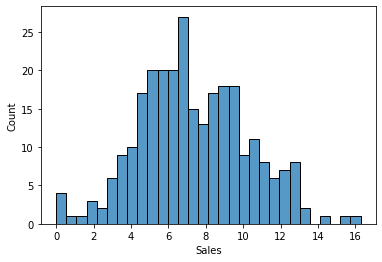

In [73]:
# data.columns
sns.histplot(data, x='Sales', bins=30)